In [113]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import random
from time import time

In [67]:
#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

### Comparing perceptron learning with hard margin linear svm

* Hard margin svm: need training data to be completely linearly separable


In [68]:
#training data in quadrants 2 and 4
#large improvement with svm when test data was linearly bounded 
    #however, results are very dependent upon how training data is distributed
def x_training_opposite(data_size):
    s = int(data_size/2)
    x_1 = list(np.random.uniform(low=-5, high=-2, size=s))
    x_1.extend(list(np.random.uniform(low=2, high=5, size=s)))
    return x_1

def y_training_opposite(data_size):
    s = int(data_size/2)
    y_1 = list(np.random.uniform(low=2, high=5, size=s)) 
    y_1.extend(list(np.random.uniform(low=-5, high=-2, size=s)))
    return y_1

In [69]:
#training data uniform 
def uniform_data(data_size):
    return np.random.uniform(low=-5, high=5, size=data_size)

In [70]:
#training data bounded between two lines
def data_lin_bound(x_values):
    y_values = []
    intercept = 1
    for i in range(len(x_values)):
        x = x_values[i]
        low_x = x - intercept
        high_x = x + intercept
        y = np.random.uniform(low=low_x, high=high_x, size=1)[0]
        y_values.append(y)
    return y_values

In [71]:
#training data bounded between two lines
def data_lin_bound_2(x_values):
    y_values = []
    intercept_inner = 2
    intercept_outer = 3
    for i in range(len(x_values)):
        x = x_values[i]
        upper_low_x = x + intercept_inner
        upper_high_x = x + intercept_outer
        
        lower_low_x = x - intercept_inner
        lower_high_x = x - intercept_outer
        y = 0
        if(random.randint(0,10) >= 5):
            y = np.random.uniform(low=upper_low_x, high=upper_high_x, size=1)[0]
        else:
            y = np.random.uniform(low=lower_low_x, high=lower_high_x, size=1)[0]
        y_values.append(y)
    return y_values

### Give correct label to data


In [72]:
### Simple perceptron And with random data
def and_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if df['X'][i] >= df['Y'][i]:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

In [128]:
def single_iteration(training_samples, test_sets, test_samples, training_type, test_type):
    training_data_size = 50
    #number of samples for each trial
    test_data_size = 200
    #number of trials
    trials = 10

    gaussian_x_loc = 0
    gaussian_y_loc = 0
    gaussian_x_scale = 2.5
    gaussian_y_scale = 1.5

    percep_avg_train = 0
    percep_avg_test = 0
    svm_avg_train = 0
    svm_avg_test = 0
    
    perceptron_time = 0
    svm_time = 0
    
    if(training_type == 'opp'):
        x_1 = x_training_opposite(training_data_size)
        y_1 = y_training_opposite(training_data_size)
    elif(training_type == 'uniform'):
        x_1 = uniform_data(training_data_size)
        y_1 = uniform_data(training_data_size)
    elif(training_type == "lin"):
        x_1 = uniform_data(training_data_size)
        y_1 = data_lin_bound(x_1)
    elif(training_type == "lin2"):
        x_1 = uniform_data(training_data_size)
        y_1 = data_lin_bound_2(x_1)
    else:
        x_1 = x_training_opposite(training_data_size)
        y_1 = y_training_opposite(training_data_size)
            

    and_df_train = pd.DataFrame({'X': x_1,
                           'Y': y_1})
    and_df_train['Label'] = and_label(and_df_train)

    X = and_df_train[['X', 'Y']]
    y = and_df_train['Label']

    clf_perceptron = Perceptron(tol=1e-3, random_state=0)
    t_1 = time()
    clf_perceptron.fit(X.values, y.values) 
    perceptron_time = time() - t_1
    
    clf_linear_svm = svm.SVC(kernel='linear', C = 1.0)
    t_1 = time()
    clf_linear_svm.fit(X.values, y.values)

    svm_time = time() - t_1
    
    percep_avg_train = (clf_perceptron.score(X.values, y.values))
    svm_avg_train = (clf_linear_svm.score(X.values, y.values))

    for _ in range(trials):

        if(test_type == 'uniform'):
            x_test = uniform_data(test_data_size)
            y_test = uniform_data(test_data_size)
        elif(test_type == 'gauss'):
            x_test = np.random.normal(loc=gaussian_x_loc, scale=gaussian_x_scale, size=test_data_size)
            y_test = np.random.normal(loc=gaussian_y_loc, scale=gaussian_y_scale, size=test_data_size)
        elif(test_type == 'lin'):
            x_test = uniform_data(test_data_size)
            y_test = data_lin_bound(x_test)
        elif(training_type == "lin2"):
            x_test = uniform_data(test_data_size)
            y_test = data_lin_bound_2(x_test)
        else:
            x_test = uniform_data(test_data_size)
            y_test = data_lin_bound(x_test)

        and_df_test = pd.DataFrame({'X': x_test,
                               'Y': y_test})
        and_df_test['Label'] = and_label(and_df_test)

        X_test = and_df_test[['X', 'Y']]
        y_test = and_df_test['Label']


        percep_avg_test += (clf_perceptron.score(X_test.values, y_test.values))
        svm_avg_test += (clf_linear_svm.score(X_test.values, y_test.values))

    plt.figure(figsize=(22,12))
    dims = [2,2]

    #plot perceptron training data
    define_plot(clf_perceptron, X, y, 'Training AND Perceptron Decision Region Boundary', 1, dims)

    #plot linear svm training data
    define_plot(clf_linear_svm, X, y, 'Training AND Linear SVM Decision Region Boundary', 2, dims)

    #plot perceptron test data
    define_plot(clf_perceptron, X_test, y_test, 'Test AND Perceptron Decision Region Boundary', 3, dims)

    #plot linear svm test data
    define_plot(clf_linear_svm, X_test, y_test, 'Test AND Linear SVM Decision Region Boundary', 4, dims)

    print("accuracy of Perceptron on training data for 50 training data points: " + str(100*percep_avg_train) + "%")
    print("accuracy of linear svm on training data for 50 training data points: " + str(100*svm_avg_train) + "%")

    print("accuracy of Perceptron on test data over " + str(trials) + " sets of 100 data points: " + str(100*percep_avg_test/trials) + "%")
    print("accuracy of linear svm on test data over " + str(trials) + " sets of 100 data points: " + str(100*svm_avg_test/trials) + "%")

    print("time taken in milliseconds to fit perceptron: {0:.4f}".format(perceptron_time*1000))
    print("time taken in milliseconds to fit svm: {0:.4f}".format(svm_time*1000))
    

In [131]:
def multiple_iterations(traing_sets, training_samples, test_sets, test_samples, training_type, test_type):
    #training data
    training_data_sets = traing_sets
    training_data_size = training_samples
    #number of trials
    trials = test_sets
    #number of samples for each trial
    test_data_size = test_samples

    gaussian_x_loc = 0
    gaussian_y_loc = 0
    gaussian_x_scale = 2.5
    gaussian_y_scale = 1.5

    percep_avg_train = 0
    percep_avg_test = 0
    svm_avg_train = 0
    svm_avg_test = 0
    
    perceptron_time = 0
    svm_time = 0

    for _ in range(training_data_sets):
        if(training_type == 'opp'):
            x_1 = x_training_opposite(training_data_size)
            y_1 = y_training_opposite(training_data_size)
        elif(training_type == 'uniform'):
            x_1 = uniform_data(training_data_size)
            y_1 = uniform_data(training_data_size)
        elif(training_type == "lin"):
            x_1 = uniform_data(training_data_size)
            y_1 = data_lin_bound(x_1)
        elif(training_type == "lin2"):
            x_1 = uniform_data(training_data_size)
            y_1 = data_lin_bound_2(x_1)
        else:
            x_1 = x_training_opposite(training_data_size)
            y_1 = y_training_opposite(training_data_size)
            
        and_df_train = pd.DataFrame({'X': x_1,
                           'Y': y_1})
        and_df_train['Label'] = and_label(and_df_train)

        X = and_df_train[['X', 'Y']]
        y = and_df_train['Label']

        clf_perceptron = Perceptron(tol=1e-3, random_state=0)
        t_1 = time()
        clf_perceptron.fit(X.values, y.values) 
        perceptron_time += time() - t_1
        
        clf_linear_svm = svm.SVC(kernel='linear', C = 1.0)
        t_1 = time()
        clf_linear_svm.fit(X.values, y.values)
        svm_time += time() - t_1

        percep_avg_train += (clf_perceptron.score(X.values, y.values))
        svm_avg_train += (clf_linear_svm.score(X.values, y.values))

        for _ in range(trials):

            if(test_type == 'uniform'):
                x_test = uniform_data(test_data_size)
                y_test = uniform_data(test_data_size)
            elif(test_type == 'gauss'):
                x_test = np.random.normal(loc=gaussian_x_loc, scale=gaussian_x_scale, size=test_data_size)
                y_test = np.random.normal(loc=gaussian_y_loc, scale=gaussian_y_scale, size=test_data_size)
            elif(test_type == 'lin'):
                x_test = uniform_data(test_data_size)
                y_test = data_lin_bound(x_test)
            elif(training_type == "lin2"):
                x_test = uniform_data(test_data_size)
                y_test = data_lin_bound_2(x_test)
            else:
                x_test = uniform_data(test_data_size)
                y_test = data_lin_bound(x_test)

            and_df_test = pd.DataFrame({'X': x_test,
                                   'Y': y_test})
            and_df_test['Label'] = and_label(and_df_test)

            X_test = and_df_test[['X', 'Y']]
            y_test = and_df_test['Label']

            percep_avg_test += (clf_perceptron.score(X_test.values, y_test.values))
            svm_avg_test += (clf_linear_svm.score(X_test.values, y_test.values))

    print("accuracy of Perceptron on training data for " + str(training_data_size) + " training data points over "
          + str(training_data_sets) + " training data sets: " + str(100*percep_avg_train/training_data_sets) + "%")
    print("accuracy of linear svm on training data for " + str(training_data_size) + " training data points over "
          + str(training_data_sets) + " training data sets: " + str(100*svm_avg_train/training_data_sets) + "%")

    print("accuracy of Perceptron on test data over " + str(trials) + " sets of " + str(test_data_size) 
          + " data points using " + str(training_data_sets) + " different training sets: " 
          + str(round(100*percep_avg_test/(training_data_sets*trials))) + "%")
    print("accuracy of linear svm on test data over " + str(trials) + " sets of " + str(test_data_size) 
          + " data points using " + str(training_data_sets) + " different traing sets: " 
          + str(round(100*svm_avg_test/(training_data_sets*trials))) + "%")    


    print("average time taken in milliseconds to fit perceptron: {0:.4f}".format(perceptron_time*1000/training_data_sets))
    print("average time taken in milliseconds to fit svm: {0:.4f}".format(svm_time*1000/training_data_sets))


## Running and visualizing a single training data set

accuracy of Perceptron on training data for 50 training data points: 100.0%
accuracy of linear svm on training data for 50 training data points: 98.0%
accuracy of Perceptron on test data over 10 sets of 100 data points: 98.4%
accuracy of linear svm on test data over 10 sets of 100 data points: 97.25%
time taken in milliseconds to fit perceptron: 7.7844
time taken in milliseconds to fit svm: 4.4391


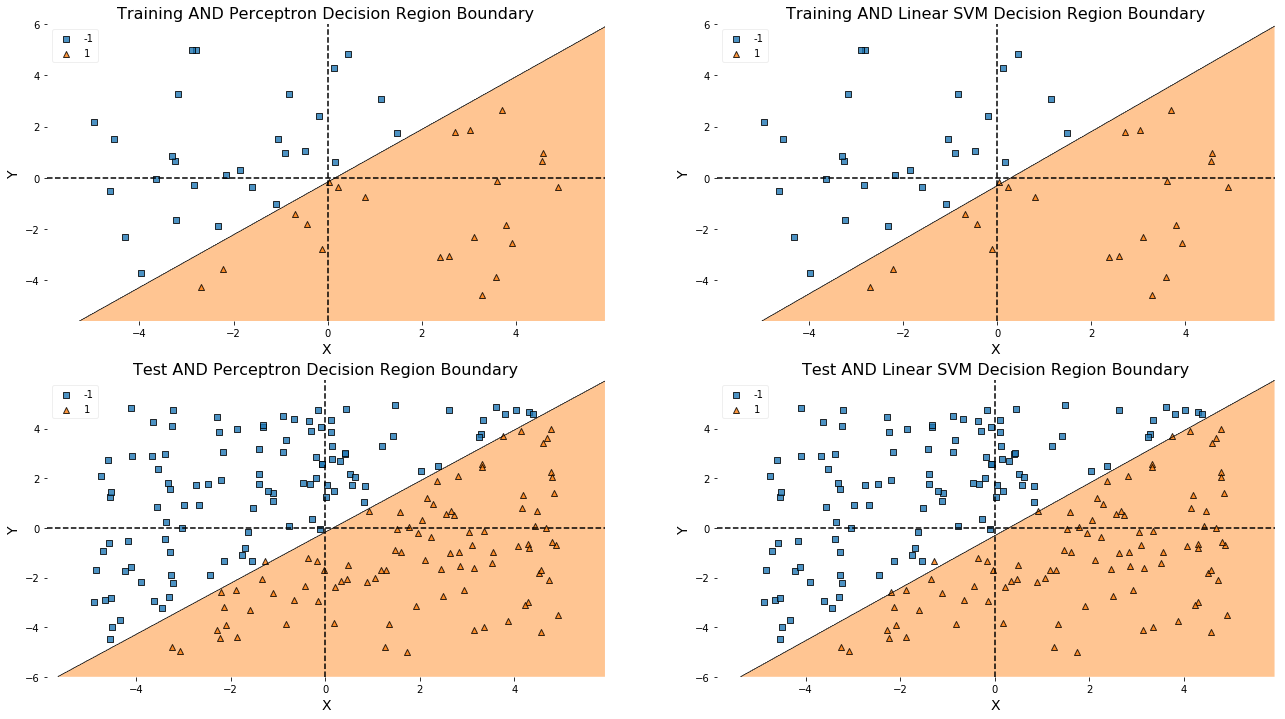

In [133]:
#single_iteration(training_samples, test_sets, test_samples, training_type, test_type)
#number of test_sets specified will be done for each training set
#training_types: opp, uniform, lin,lin2
#test_types: uniform, gauss, lin

single_iteration(50,10,200, 'uniform', 'uniform')

## Running multiple training data sets

In [134]:
#multiple_iterations(traing_sets, training_samples, test_sets, test_samples, training_type, test_type)
#number of test_sets specified will be done for each training set
#training_types: opp, uniform, lin, lin2
#test_types: uniform, gauss, lin, lin2
multiple_iterations(10,50,10,200, 'uniform', 'uniform')

accuracy of Perceptron on training data for 50 training data points over 10 training data sets: 99.8%
accuracy of linear svm on training data for 50 training data points over 10 training data sets: 98.79999999999998%
accuracy of Perceptron on test data over 10 sets of 200 data points using 10 different training sets: 97.0%
accuracy of linear svm on test data over 10 sets of 200 data points using 10 different traing sets: 96.0%
average time taken in milliseconds to fit perceptron: 0.6349
average time taken in milliseconds to fit svm: 0.5447
